In [5]:
#!pip install geopandas

In [6]:
import os
import time
from datetime import date, timedelta

import pandas as pd
import numpy as np

import requests 
from bs4 import BeautifulSoup

import io
import re
import itertools
import zipfile

import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import geopandas as gp
import numpy as np
import sys

from matplotlib import cm
import geopandas

In [7]:
pays = pd.read_excel("PaysdAfrique.xlsx")

In [8]:
med = pd.read_excel("Medical Devices Africa.xlsx")

In [9]:
med["Women"] = pd.to_numeric(med.Women, errors='coerce')
med["MAM"] = pd.to_numeric(med.MAM, errors='coerce')
med["mamo"] = med["MAM"]*med["Women"]/100

In [10]:
North = ["MAR","DZA","TUN","LBY","EGY","SDN", "SSD"]
South = ["NAM","BWA","ZAF","SWZ","LSO"] 
Central = ["TCD","CAF","CMR","GNQ","GAB","COG","COD","AGO", "STP"]#ok

West = ["MRT","SEN","GMB","GIN","SLE","LBR","GHA","TGO","BEN","NGA", "BFA", "CPV", "CIV", "GNB", "MLI", "NER",'ESH']
East = ["BDI", "COM", "DJI", "ERI", "ETH", "KEN", "MDG", "MWI", "MUS", "MOZ", "RWA", "SYC", "SOM", "UGA", "ZMB", "ZWE", "TZA", "-99"]

In [11]:
path = gp.datasets.get_path('naturalearth_lowres')
earth = gp.read_file(path)
africa = earth[earth.continent=='Africa'].copy()

In [12]:
orient = earth[earth.continent=='Asia'].copy()
pal = orient[orient.name=='Palestine']
pal.to_csv(r'earth.csv', index = False)

In [13]:
t = africa['iso_a3'].copy()
reg = ['NULL' for i in range(len(t))]
for i in range(51):
    x = t.iloc[i]
    if x in North:
        reg[i] = 'North'
        #print(reg)
    elif x in East:
        reg[i] = 'East'
    elif x in West:
        reg[i] = 'West'
    elif x in Central:
        reg[i] = 'Central'
    elif x in South:
        reg[i] = 'South'
    else:
        reg[i] = 'NULL'
print(reg)
africa['Region'] = reg
africa = africa.sort_values('Region').copy()

['East', 'West', 'Central', 'East', 'East', 'North', 'Central', 'South', 'South', 'East', 'South', 'South', 'West', 'West', 'West', 'West', 'West', 'West', 'Central', 'West', 'West', 'West', 'West', 'West', 'West', 'West', 'West', 'Central', 'Central', 'Central', 'Central', 'East', 'East', 'East', 'South', 'Central', 'East', 'East', 'West', 'North', 'North', 'East', 'North', 'North', 'North', 'East', 'East', 'East', 'East', 'East', 'North']


In [14]:
africa[['name']].head()

,name
66,Central African Rep.
11,Dem. Rep. Congo
68,Gabon
69,Eq. Guinea
15,Chad


In [15]:
med['name'] = med['Country']
med = med.sort_values(by=['name'])

In [16]:
df = africa.merge(med, on='name').copy()
df = df.sort_values(by=['name'])

In [17]:
med['summe'] = round((med['CT'] + med['MRI'] + med['PET'] + med['GC'] + med['LA'] + med['TU'] + med['R'] + med['mamo']),1)
df = africa.merge(med, on='name').copy()

df.sort_values(by=['summe'], inplace=True, ascending=False)
df[['Country', "summe"]].head()

,Country,summe
22,Tunisia,17.4
25,Libya,17.3
32,Namibia,9.5
2,Gabon,9.1
23,Morocco,3.8


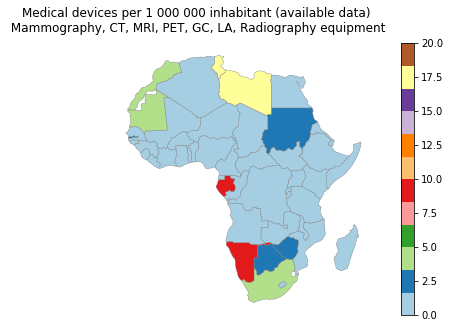

In [19]:
from matplotlib import cm
#cmap = cm.get_cmap('Spectral')
cmap = cm.get_cmap('Paired')
#cmap = cm.get_cmap('tab20c')
#cmap = cm.get_cmap('Accent')

#from cartopy import crs as ccrs
# Generate a figure with two axes, one for CartoPy, one for GeoPandas
fig, axs = plt.subplots(1,1,figsize=(10, 5), sharex=True, sharey=True)
fig.suptitle('Medical devices per 1 000 000 inhabitant (available data)\n Mammography, CT, MRI, PET, GC, LA, Radiography equipment')
# Make the CartoPy plot
line1 = df.plot(column='summe', cmap=cmap, legend=True, linewidth=0.4, ax=axs, edgecolor='0.5', vmin=0, vmax=20)
axs.axis('off')
#plt.savefig(r'med6.png')
plt.show()

In [20]:
med[['Country', "summe"]].sort_values(by=['summe']).head(12)

,Country,summe
26,Liberia,0.0
34,Mozambique,0.0
25,Lesotho,0.0
23,Guinea-Bissau,0.0
22,Guinea,0.0
38,Rwanda,0.0
16,Eq. Guinea,0.0
14,Djibouti,0.0
11,Congo,0.0
39,Sao Tome and Principe,0.0


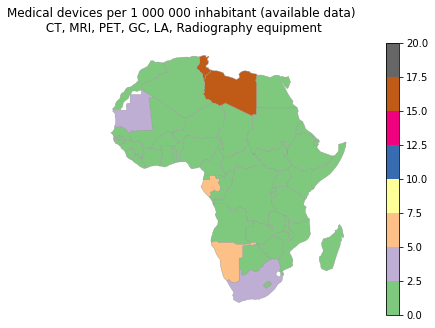

,Country,summe
25,Libya,17.3
22,Tunisia,15.4
32,Namibia,7.4
2,Gabon,6.0
29,South Africa,2.9


In [21]:
med['summe'] = round((med['CT'] + med['MRI'] + med['PET'] + med['GC'] + med['LA'] + med['TU'] + med['R']),1)
df = africa.merge(med, on='name').copy()

#cmap = cm.get_cmap('Paired')
#cmap = cm.get_cmap('tab20c')
cmap = cm.get_cmap('Accent')

#from cartopy import crs as ccrs
# Generate a figure with two axes, one for CartoPy, one for GeoPandas
fig, axs = plt.subplots(1,1,figsize=(10, 5), sharex=True, sharey=True)
fig.suptitle('Medical devices per 1 000 000 inhabitant (available data)\n CT, MRI, PET, GC, LA, Radiography equipment')
# Make the CartoPy plot
line1 = df.plot(column='summe', cmap=cmap, legend=True, linewidth=0.4, ax=axs, edgecolor='0.6', vmin=0, vmax=20)
axs.axis('off')
plt.savefig(r'med7.png')
plt.show()

df.sort_values(by=['summe'], inplace=True, ascending=False)
df[['Country', "summe"]].head()

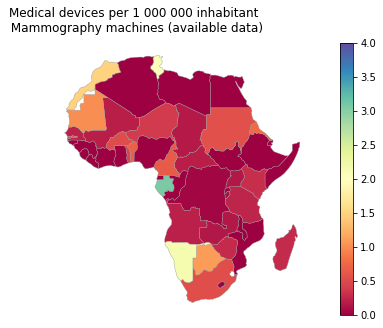

,Country,mamo
2,Gabon,3.07104
32,Namibia,2.15730
22,Tunisia,2.07736
23,Morocco,1.49526
31,Botswana,1.10780


In [22]:
df = africa.merge(med, on='name').copy()

cmap = cm.get_cmap('Paired')
cmap = cm.get_cmap('Spectral')
#cmap = cm.get_cmap('Accent')

#from cartopy import crs as ccrs
# Generate a figure with two axes, one for CartoPy, one for GeoPandas
fig, axs = plt.subplots(1,1,figsize=(10, 5), sharex=True, sharey=True)
fig.suptitle('Medical devices per 1 000 000 inhabitant \n Mammography machines (available data)')
# Make the CartoPy plot
line1 = df.plot(column='mamo', cmap=cmap, legend=True, linewidth=0.4, ax=axs, edgecolor='0.6', vmin=0, vmax=4)
axs.axis('off')
plt.savefig(r'med8.png')
plt.show()

df.sort_values(by=['mamo'], inplace=True, ascending=False)
df[['Country', "mamo"]].head()